# Unsupervised Learning

## Part #1 – K-Means

Importing some necessary libraries

In [58]:
from sklearn.datasets import make_blobs
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

### Part #1-1. Generate and plot a 2D dataset with c classes of 1000 points.

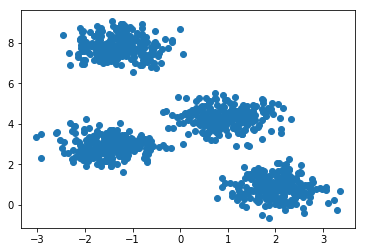

In [34]:
c = 4
X, y = make_blobs(n_samples=1000, centers = c,  random_state = 0, cluster_std = 0.5)

# plot a 2d training dataset with c classes of 1000 points
plt.scatter(X[:,0], X[:,1])
plt.show()

### Part #1-2. Select k the number of clusters equal to the c in Step 1, implement K-means algorithm with cluster centers initialized randomly

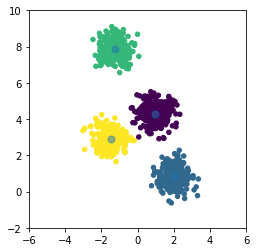

In [95]:
km = KMeans(init='random', n_clusters = 4)
kmeans_y = km.fit_predict(X)
kmeans_centers = km.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], s = 20, c = kmeans_y, cmap = 'viridis')
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], s = 50, alpha = 0.5)
plt.ylim(-2, 10)
plt.xlim(-6, 6)
plt.gca().set_aspect('equal')
plt.show()

### Part #1-2. Select k the number of clusters equal to the c in Step 1, implement K-means algorithm with cluster centers initialized using K-means++ algorithm.

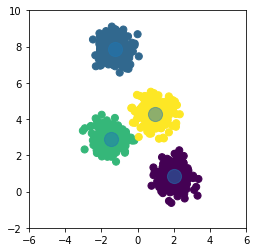

In [36]:
kmpp = KMeans(init='k-means++', n_clusters = 4)

kmeanspp_y = kmpp.fit_predict(X)
kmeanspp_centers = kmpp.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], s = 50, c = kmeanspp_y, cmap = 'viridis')
plt.scatter(kmeanspp_centers[:, 0], kmeanspp_centers[:, 1], s = 200, alpha = 0.5)
plt.ylim(-2, 10)
plt.xlim(-6, 6)
plt.gca().set_aspect('equal')
plt.show()

## Part #2 – Hierarchical Clustering

### Part #2-1. Generate and plot a 2D dataset with c classes of 1000 points.

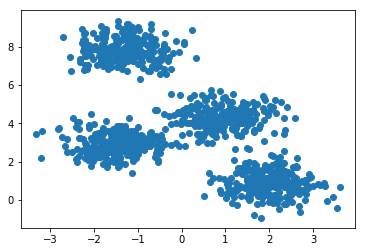

In [37]:
c = 4
X2, y2 = make_blobs(n_samples=1000, centers = c,  random_state = 0, cluster_std = 0.6)

# plot a 2d training dataset with c classes of 1000 points
plt.scatter(X2[:,0], X2[:,1])
plt.show()

### Part #2-2. Select k the number of clusters equal to the c in Step 2-1, implement Agglomerative Hierarchical Clustering algorithm.

In [85]:
# Which linkage is the best: single linkage is fast, and can perform well on non-globular data,
# but it performs poorly in the presence of noise. average and complete linkage perform well on 
# cleanly separated globular clusters, but have mixed results otherwise. Ward is the most effective method for noisy data.

model = AgglomerativeClustering(n_clusters=4, linkage='ward')
model.fit(X2)
labels = model.labels_

### Part #2-3. Visualize the results of Step 2-2 and the corresponding dendogram of the clustering algorithm.

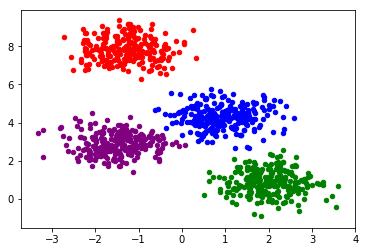

In [88]:
plt.scatter(X2[labels==0, 0], X2[labels==0, 1], s=20, marker='o', color='red')
plt.scatter(X2[labels==1, 0], X2[labels==1, 1], s=20, marker='o', color='blue')
plt.scatter(X2[labels==2, 0], X2[labels==2, 1], s=20, marker='o', color='green')
plt.scatter(X2[labels==3, 0], X2[labels==3, 1], s=20, marker='o', color='purple')
plt.show()

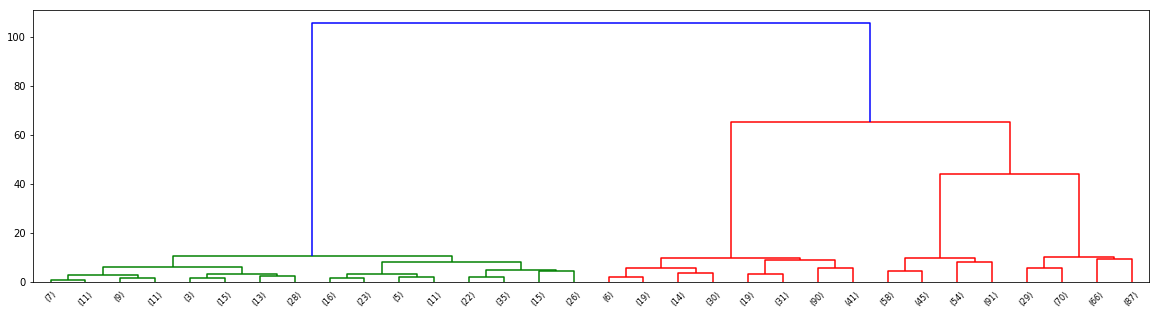

In [94]:
plt.figure(figsize=(20, 5))  
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X2, method='ward'), p=4, truncate_mode='level', orientation='top')